In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('netflix.csv')

In [4]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4876,05-10-2021,640.390015,606.890015,606.940002,634.809998,9534300,634.809998
4877,06-10-2021,639.869995,626.359985,628.179993,639.099976,4580400,639.099976
4878,07-10-2021,646.840027,630.450012,642.229981,631.849976,3556900,631.849976
4879,08-10-2021,643.799988,630.859985,634.169983,632.659973,3271100,632.659973


In [5]:
# Extract the 'Close' price as the target variable
data = df[['Close']]


In [6]:
data

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571
4,1.071429
...,...
4876,634.809998
4877,639.099976
4878,631.849976
4879,632.659973


In [23]:
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])
# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)



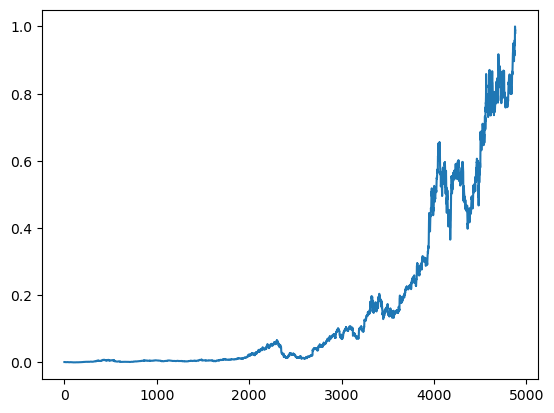

In [21]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [8]:
# Define a function to create sequences for the LSTM model
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)
# Define hyperparameters
sequence_length = 10
batch_size = 64
epochs = 100

# Create sequences for training
X, y = create_sequences(data['Close'].values.reshape(-1, 1), sequence_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/100
61/61 [==============================] - 2s 13ms/step - loss: 113.2921 - val_loss: 362.2750
Epoch 2/100
61/61 [==============================] - 1s 8ms/step - loss: 6.0361 - val_loss: 308.7408
Epoch 3/100
61/61 [==============================] - 0s 6ms/step - loss: 3.6028 - val_loss: 209.0160
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: 3.2303 - val_loss: 243.4922
Epoch 5/100
61/61 [==============================] - 0s 7ms/step - loss: 2.8438 - val_loss: 301.4351
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 2.9428 - val_loss: 309.0275
Epoch 7/100
61/61 [==============================] - 0s 7ms/step - loss: 2.5978 - val_loss: 240.5032
Epoch 8/100
61/61 [==============================] - 0s 7ms/step - loss: 2.6190 - val_loss: 207.1011
Epoch 9/100
61/61 [==============================] - 0s 7ms/step - loss: 2.3788 - val_loss: 167.9877
Epoch 10/100
61/61 [==============================] - 0s 8ms/step - loss: 2.1602 - val_l

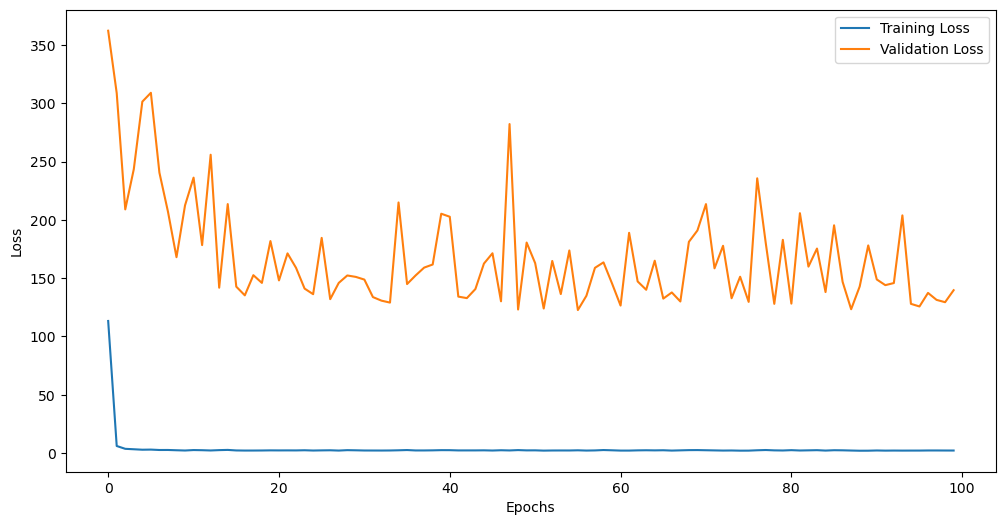

In [9]:
# Plot training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Predict stock prices
from sklearn.preprocessing import MinMaxScaler

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

31/31 [==============================] - 0s 3ms/step


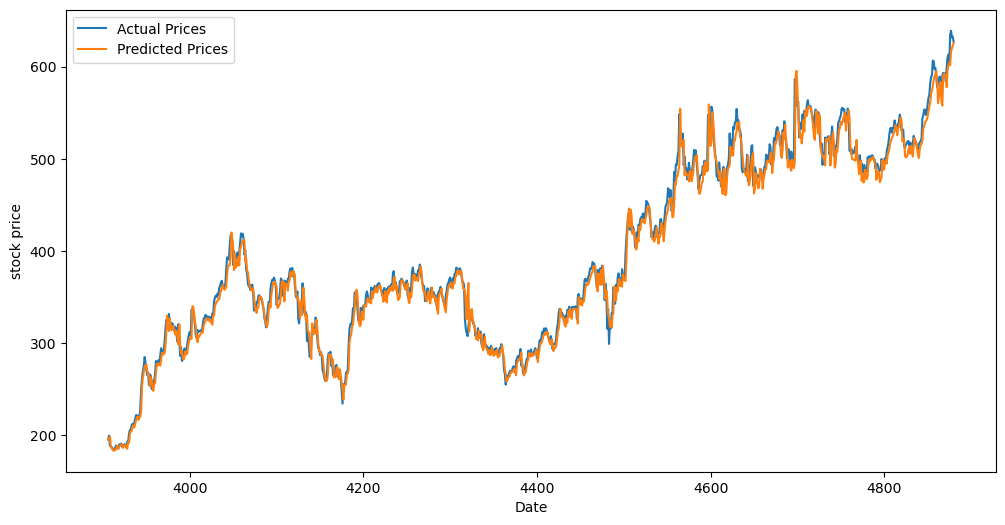

In [25]:

# Plot predicted vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], actual_prices, label='Actual Prices')
plt.plot(df.index[-len(y_test):], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()


122/122 [==============================] - 0s 3ms/step


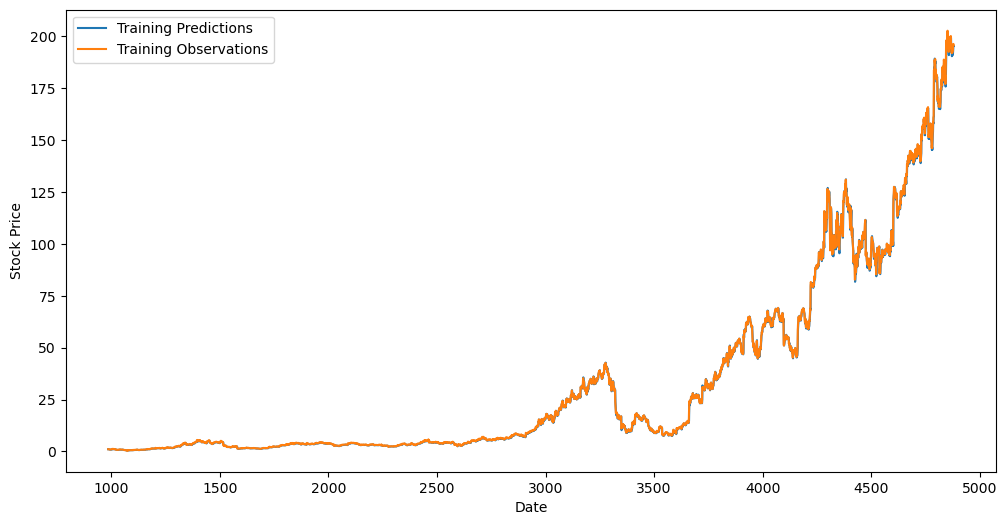

In [26]:
# Predict stock prices for training
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
# Plot training predictions and observations
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_train):], train_predictions, label='Training Predictions')
plt.plot(df.index[-len(y_train):], y_train, label='Training Observations')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


31/31 [==============================] - 0s 2ms/step


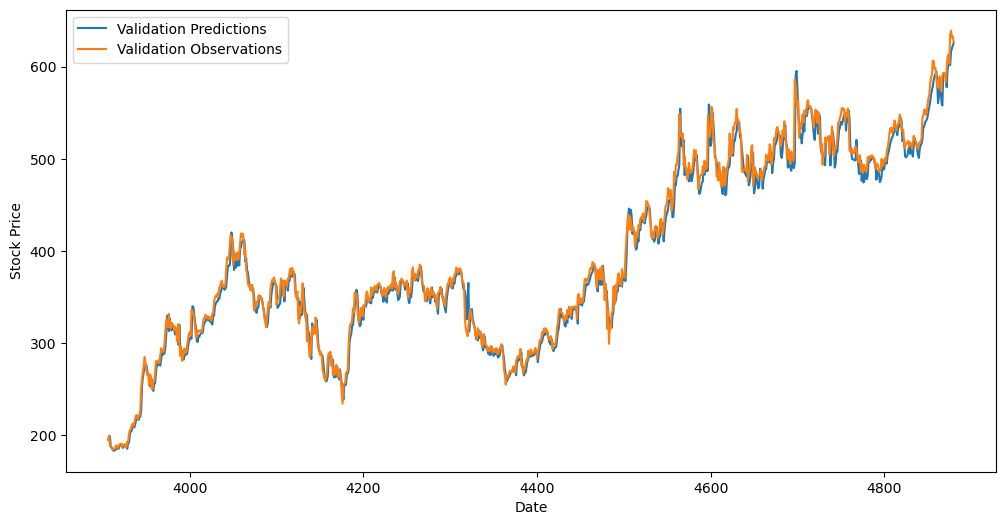

In [27]:
# Predict stock prices for validation
val_predictions = model.predict(X_test)
val_predictions = scaler.inverse_transform(val_predictions)
# Plot validation predictions and observations
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], val_predictions, label='Validation Predictions')
plt.plot(df.index[-len(y_test):], y_test, label='Validation Observations')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

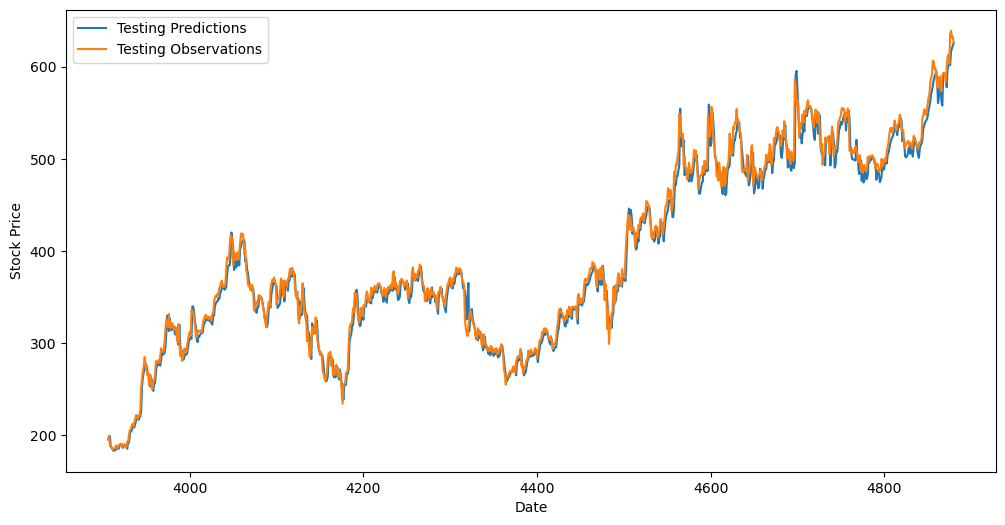

In [28]:
# Predict stock prices for testing sets
test_predictions = predicted_prices
# Plot testing predictions and observations
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], test_predictions, label='Testing Predictions')
plt.plot(df.index[-len(y_test):], actual_prices, label='Testing Observations')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

31/31 [==============================] - 0s 2ms/step


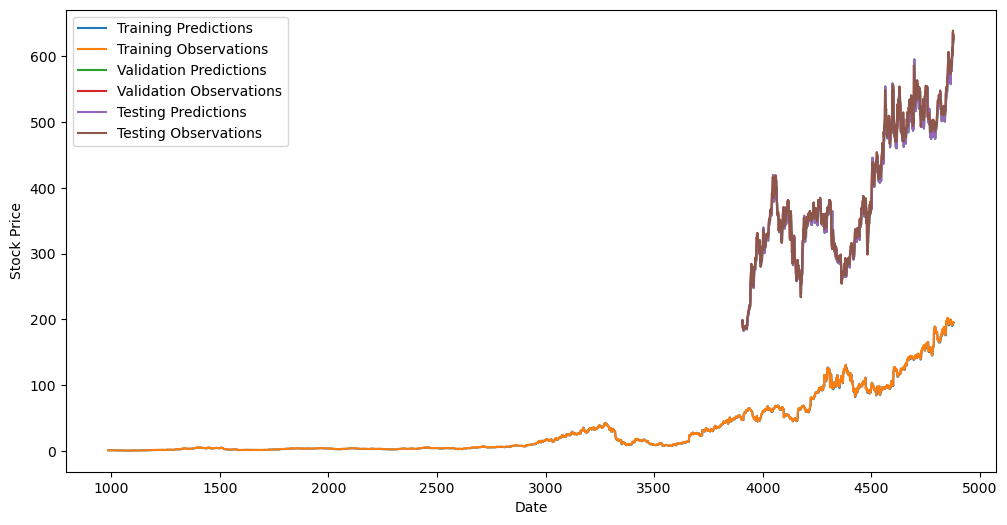

In [29]:


# Predict stock prices for training and validation sets
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

val_predictions = model.predict(X_test)
val_predictions = scaler.inverse_transform(val_predictions)



# Plot predicted vs. actual prices for training, validation, and testing sets
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_train):], train_predictions, label='Training Predictions')
plt.plot(df.index[-len(y_train):], y_train, label='Training Observations')
plt.plot(df.index[-len(y_test):], val_predictions, label='Validation Predictions')
plt.plot(df.index[-len(y_test):], y_test, label='Validation Observations')
plt.plot(df.index[-len(y_test):], predicted_prices, label='Testing Predictions')
plt.plot(df.index[-len(y_test):], actual_prices, label='Testing Observations')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


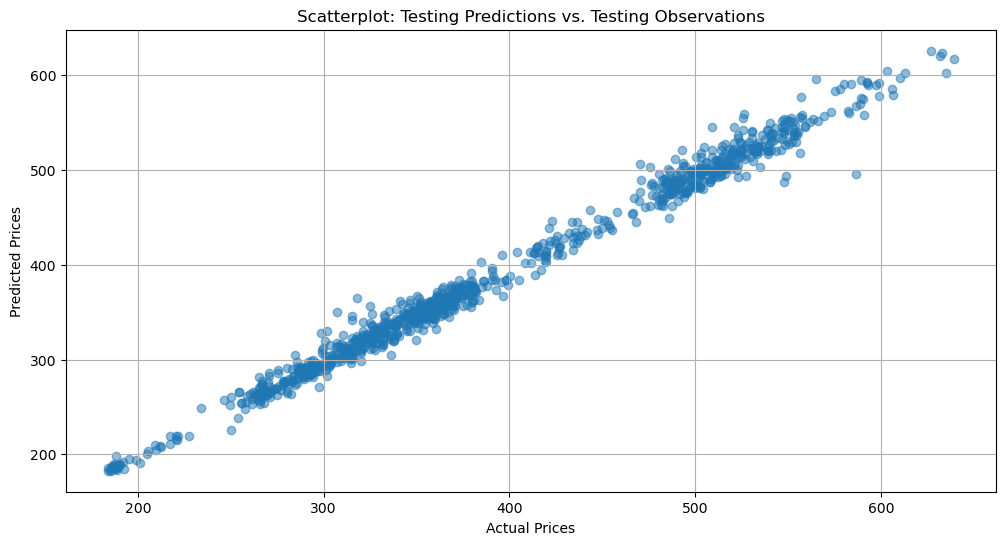

In [30]:



# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])
actual_prices = scaler.inverse_transform(y_test)
test_predictions = predicted_prices
# Create a scatterplot for Testing Predictions vs. Testing Observations
plt.figure(figsize=(12, 6))
plt.scatter(actual_prices, test_predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatterplot: Testing Predictions vs. Testing Observations')
plt.grid(True)
plt.show()
